In [337]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Загрузка данных

In [338]:
#%%capture
#!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [339]:
data = pd.read_excel('data_ford_price.xlsx') 

In [340]:
data

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [344]:
from sklearn.preprocessing import OneHotEncoder

cols_to_change=['title_status','transmission','drive','size','cylinders']
encoder=OneHotEncoder()
cols_encoder=encoder.fit_transform(data[cols_to_change]).toarray()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


In [346]:
pd.DataFrame(cols_encoder)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7014,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7015,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Предобработка: удаление пропусков

In [287]:
data[~data['weather'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [288]:
y = data['price']
x = data.drop(columns='price')

In [289]:
x = x.dropna()

In [290]:
y = y.iloc[x.index]

In [291]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

## Кодирование категориальных переменных

In [292]:
from sklearn.preprocessing import OneHotEncoder

In [293]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']

In [294]:
def encode_cat_features(columns_to_change, X_train, X_test, y_train):
    one_hot_encoder = OneHotEncoder()
    X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
    X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

    columns = one_hot_encoder.get_feature_names_out(columns_to_change)
    
    X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
    X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

    X_train = X_train.reset_index().drop(['index'], axis = 1)
    X_test = X_test.reset_index().drop(['index'], axis = 1)
    y_train = y_train.reset_index().drop(['index'], axis = 1)

    X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
    X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
    
    X_train_new = X_train_new.drop(columns=columns_to_change)
    X_test_new = X_test_new.drop(columns=columns_to_change)

    return X_train_new, X_test_new

In [295]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

## Обучение модели 

In [296]:
lr_model = LinearRegression()

In [297]:
lr_model.fit(X_train_new, y_train)
y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.647
Test R^2: 0.693


# Предобработка: заполнение пропусков

In [298]:
y = data['price']
x = data.drop(columns='price')

In [299]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [300]:
X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_train['weather']),0))

In [301]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5613 entries, 4696 to 5925
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5613 non-null   int64  
 1   condition     5613 non-null   int64  
 2   cylinders     5613 non-null   int64  
 3   odometer      5613 non-null   int64  
 4   title_status  5613 non-null   object 
 5   transmission  5613 non-null   object 
 6   drive         5283 non-null   object 
 7   size          4363 non-null   object 
 8   lat           5613 non-null   float64
 9   long          5613 non-null   float64
 10  weather       5613 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 526.2+ KB


In [302]:
X_train['drive'].value_counts(True).head(1)

4wd    0.738406
Name: drive, dtype: float64

In [303]:
X_train['size'].value_counts(True).head(1)


full-size    0.841164
Name: size, dtype: float64

In [304]:
X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')
 
X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

In [305]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

In [306]:
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train)
y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.649
Test R^2: 0.465


# Предсказание пропусков с помощью ML

In [307]:
data = x.copy()
 
test_data = data[data['weather'].isnull()]
data.dropna(inplace=True)
 
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)


In [308]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          5453 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       6837 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB


In [309]:
categorial_cols = ['cylinders', 'title_status', 'transmission']

In [310]:
X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

In [311]:
model = LinearRegression()
model.fit(X_train_new, y_train)
 
y_pred = model.predict(X_test_new)
y_pred

array([ 40.91435555,  40.7637233 ,  39.74866152,  41.2755305 ,
        40.31791932,  41.10796547,  41.15337846,  39.94866488,
        41.10796547,  40.7217165 ,  40.18904454,  91.62094167,
        41.12549856,  41.33052316,  39.66827354,  40.91435555,
        40.77287826,  40.84208674,  41.10796547,  41.02118034,
        40.31791932,  41.30309209,  40.77645269,  40.75842615,
        40.61605044,  40.79031628,  40.7701239 ,  39.78723017,
        41.27231621,  39.77492057,  40.7637233 ,  40.7701239 ,
        41.10796547,  39.68313064,  40.12277414,  39.7873657 ,
        41.07798631,  41.06812063,  40.7637233 ,  40.90194049,
        41.10796547,  70.85737739,  30.44339508,  40.76125291,
        39.77492057,  41.12549856,  39.74864816,  40.72219488,
        40.97162064,  40.7448585 ,  39.71065847,  39.78779447,
        39.77492057,  40.15945849,  41.12549856,  40.7902779 ,
        39.65555168,  41.10796547,  40.76125291,  40.15619215,
        40.79031628,  41.10796547,  40.7902779 ,  40.72

## Решение Задания 4.5


Вставьте найденную замену на место пропусков в столбце weather. Используйте тот же метод для заполнения пропусков в size. Обратите внимание на тип модели, который нужен (классификация или регрессия) в зависимости от типа признака. 

In [312]:
for i, ni in enumerate(test_data.index):
    x.loc[ni, 'weather'] = y_pred[i]

In [313]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          5453 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       7017 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB


In [314]:
x['size'].value_counts()

full-size      4570
mid-size        867
compact          15
sub-compact       1
Name: size, dtype: int64

In [315]:
test_size=x[x['size'].isnull()]
y_train=data['size']
X_train=data.drop(['size','drive'],axis=1)
X_test=test_size.drop(['size','drive'],axis=1)



In [316]:
test_size

,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
4,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,40.914356
8,2011,2,6,77000,clean,automatic,rwd,NaN,33.698900,-84.745400,59.000000
12,2001,1,8,275000,clean,automatic,4wd,NaN,44.549400,-90.611200,45.000000
25,2016,3,8,25814,clean,automatic,4wd,NaN,43.852883,-88.855927,45.000000
33,2005,2,8,148000,clean,automatic,4wd,NaN,61.153500,-149.828900,29.000000
...,...,...,...,...,...,...,...,...,...,...,...
6983,2004,1,8,179945,clean,automatic,rwd,NaN,40.010899,-74.131575,52.000000
6987,2014,3,6,91383,clean,automatic,4wd,NaN,43.223605,-76.802231,53.000000
6991,2010,2,8,101215,clean,automatic,rwd,NaN,43.098946,-76.097853,53.000000
7007,2014,3,8,40000,clean,automatic,4wd,NaN,36.562900,-82.653200,59.000000


In [317]:
X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

In [318]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial')
model.fit(X_train_new,y_train)
predict_price=model.predict(X_test_new)

/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [319]:
for num,value in enumerate(test_size.index):
    x.loc[value,'size']=predict_price[num]

In [320]:
data_drive=x[x['drive'].isnull()]
X_train=data.drop(['size','drive'],axis=1)
y_train=data['drive']
X_test=data_drive.drop(['drive','size'],axis=1)

In [321]:
X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

In [322]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial')
model.fit(X_train_new,y_train)
predict_drive=model.predict(X_test_new)

/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [323]:
predict_drive

array(['4wd', '4wd', 'rwd', '4wd', 'rwd', '4wd', 'rwd', 'rwd', 'rwd',
       '4wd', 'rwd', 'rwd', '4wd', '4wd', '4wd', 'rwd', '4wd', '4wd',
       '4wd', '4wd', '4wd', '4wd', 'rwd', '4wd', '4wd', '4wd', '4wd',
       'rwd', 'rwd', '4wd', 'rwd', 'rwd', '4wd', 'rwd', '4wd', '4wd',
       '4wd', '4wd', '4wd', 'rwd', '4wd', '4wd', '4wd', '4wd', '4wd',
       'rwd', '4wd', '4wd', '4wd', '4wd', 'rwd', '4wd', '4wd', '4wd',
       'rwd', '4wd', '4wd', '4wd', '4wd', '4wd', '4wd', '4wd', 'rwd',
       '4wd', 'rwd', '4wd', '4wd', '4wd', '4wd', 'rwd', 'rwd', '4wd',
       'rwd', 'rwd', '4wd', '4wd', '4wd', '4wd', '4wd', 'rwd', '4wd',
       '4wd', '4wd', '4wd', '4wd', '4wd', '4wd', '4wd', '4wd', '4wd',
       '4wd', 'rwd', '4wd', '4wd', '4wd', 'rwd', '4wd', '4wd', 'rwd',
       '4wd', '4wd', '4wd', '4wd', '4wd', '4wd', 'rwd', '4wd', 'rwd',
       '4wd', '4wd', '4wd', '4wd', 'rwd', '4wd', '4wd', 'rwd', '4wd',
       '4wd', '4wd', 'rwd', 'rwd', '4wd', '4wd', 'rwd', 'rwd', '4wd',
       '4wd', '4wd',

In [324]:
for num,value in enumerate(data_drive.index):
    x.loc[value,'drive']=predict_drive[num]

In [325]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         7017 non-null   object 
 7   size          7017 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       7017 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB


<Axes: >

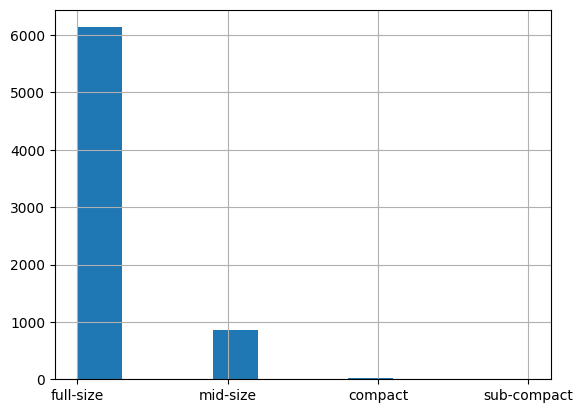

In [326]:
x['size'].hist()

Данный признак является категориальным. Следовательно, понадобится классификатор для заполения пропусков в нем.

In [30]:
data = x.copy()
 
test_data = data[data['size'].isnull()]
data.dropna(inplace=True)
 
y_train = data['size']
X_train = data.drop(['size', 'drive'], axis=1)
X_test = test_data.drop(['size','drive'], axis=1)

In [31]:
X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_new, y_train)
 
y_pred = model.predict(X_test_new)
y_pred

array(['full-size', 'full-size', 'full-size', ..., 'full-size',
       'full-size', 'full-size'], dtype=object)

In [33]:
for i, ni in enumerate(test_data.index):
    x.loc[ni, 'size'] = y_pred[i]

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          7017 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       7017 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB


# Пребодработка: работа с выбросами

In [348]:
data = pd.read_excel('data_ford_price.xlsx') 

In [349]:
data = data[['price', 'year', 'cylinders', 'odometer' ,'lat', 'long','weather']]
data.dropna(inplace = True)

In [350]:
y = data['price']
x = data.drop(columns='price')
x.head()

,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483400,59.0
1,2009,8,98131,40.468826,-74.281734,52.0
2,2002,8,201803,42.477134,-82.949564,45.0
3,2000,8,170305,40.764373,-82.349503,49.0
5,2003,8,167662,45.518031,-122.578752,50.0


In [351]:
from sklearn.metrics import mean_absolute_error

In [352]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)


MAE: 4682.957


In [353]:
from  sklearn.ensemble import IsolationForest
 
# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
iso.fit(X_train.values)
y_predicted = iso.predict(X_train.values)

In [368]:
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [364]:
from  sklearn.ensemble import IsolationForest
 
# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
y_predicted = iso.fit_predict(X_train)
 
# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]

In [367]:
pd.DataFrame(mask)

,0
0,True
1,True
2,True
3,True
4,True
...,...
3870,False
3871,True
3872,True
3873,True


In [356]:
pd.DataFrame(y_predicted)

,0
0,1
1,1
2,1
3,1
4,1
...,...
4780,1
4781,1
4782,1
4783,-1


In [357]:
# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(4306, 6) (4306,)
MAE: 4423.360


In [42]:
from sklearn.neighbors import LocalOutlierFactor
 
lof = LocalOutlierFactor()
y_predicted = lof.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3958, 6) (3958,)
MAE: 4437.135


In [43]:
from sklearn.covariance import EllipticEnvelope
 
ee = EllipticEnvelope(contamination=0.01)
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3918, 6) (3918,)
MAE: 4436.420
